# Pictet Case Study - Which country will you invest in?

# Section 1 - ESG framework and data exploration

In [1]:
import pandas as pd
import numpy as np
import wbdata
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Risk premium Excel file
df = pd.read_excel('2021_ESG_datascientist_casestudy_v2_data.xlsx')
df.head()

,Date,ARG,BHR,BGD,BRB,BRA,CHL,CHN,COL,CRI,...,ZAF,KOR,TWN,TZA,THA,TTO,TUR,UKR,ARE,ZWE
0,2010-01-29,464.351,392.941,NaN,712.853,304.662,224.502,667.424,373.192,NaN,...,459.082,254.194,400.960,NaN,283.215,NaN,517.126,1376.331,408.946,NaN
1,2010-02-26,460.941,427.910,NaN,759.959,288.340,249.703,744.089,356.209,NaN,...,514.118,256.855,422.153,NaN,288.972,NaN,526.159,1411.650,409.554,NaN
2,2010-03-31,383.004,394.637,NaN,618.887,240.890,232.358,663.063,312.686,NaN,...,441.662,220.201,365.876,NaN,248.962,NaN,503.233,787.873,319.135,NaN
3,2010-04-30,384.763,356.807,NaN,612.913,259.530,225.250,547.414,317.405,NaN,...,457.823,217.857,324.948,NaN,262.821,NaN,521.688,788.378,318.533,NaN
4,2010-05-31,463.823,366.155,NaN,767.673,334.854,285.291,727.879,388.478,NaN,...,537.613,276.839,397.631,NaN,310.661,NaN,559.676,973.514,394.396,NaN


In [3]:
# Retrieve emerging countries ids
country_id = list(df.columns[1:])

In [4]:
## Retrieve data from API
#, "ER.LND.PTLD.ZS": "terr_protect", "ER.MRN.PTMR.ZS": "mar_protect"
# "AG.LND.FRST.ZS": "forest_area",
# Select countries
countries = list(df.columns[1:])

# Select indicators
indicators = {"NY.GNP.MKTP.PC.CD": "gni_pc",
              "CC.EST": "corr_contr", "GE.EST": "gov_eff", "PV.EST": "pol_stab", "RL.EST": "rule_law", "RQ.EST": "reg_qual", "VA.EST": "voice_acc",
              "SH.DYN.MORT": "infant_mort", "SP.DYN.LE00.IN" : "life_exp", "PRJ.MYS.15UP.MF": "school_years", "SPI.D3.1.POV": "poverty_line",
              "SL.EMP.VULN.ZS": "vuln_empl", "SL.TLF.CACT.FM.ZS": "women_man_labour_part", "SL.UEM.TOTL.ZS": "unempl_rate",
              "SN.ITK.DEFC.ZS": "undernour_rate", "EG.ELC.ACCS.ZS": "electr_access", "IT.NET.USER.ZS": "internet_use",
              "SG.GEN.PARL.ZS": "women_parliament", "SE.ENR.PRSC.FM.ZS": "enroll_prim_sec_gpi", "SE.ENR.TERT.FM.ZS": "enroll_tert_gpi",
              "5.51.01.07.gender": "gender_equality", "EN.ATM.CO2E.PC": "CO2_pc", "NY.ADJ.DRES.GN.ZS": "nat_resources_depl",
              "EG.FEC.RNEW.ZS": 'renew_energy_cons',"EN.ATM.PM25.MC.M3": "pm25_exposure", "ER.LND.PTLD.ZS": "terr_protect", "ER.MRN.PTMR.ZS": "mar_protect",
              "AG.LND.FRST.ZS": "forest_area"}

# Import data in a dataframe
df_wb = wbdata.get_dataframe(indicators, country=countries, freq='M', data_date=(datetime.datetime(2021,9,30), datetime.datetime(2010,1,1)), convert_date=True).unstack(level=0)

# Filter data for period 2010-2021 and fill missing values via interpolation
df_esg = df_wb[(df_wb.index >= "2010") & (df_wb.index <= "2021")].interpolate(method='linear', limit=5, limit_direction='forward').stack().reset_index()


# Info dataset
print('Data shape:', df_esg.shape, '\n')
print('Number of countries:', df_esg['country'].nunique(), '\n')
print('Time range:', df_esg['date'].min(), '-', df_esg['date'].max(), '\n')
print('Number of observations per country:', '\n')
display(df_esg.groupby('country')['country'].count())

df_esg.head()

Data shape: (572, 30) 

Number of countries: 52 

Time range: 2010-01-01 00:00:00 - 2020-01-01 00:00:00 

Number of observations per country: 



country
Argentina               11
Bahrain                 11
Bangladesh              11
Barbados                11
Brazil                  11
Chile                   11
China                   11
Colombia                11
Costa Rica              11
Czech Republic          11
Dominican Republic      11
Egypt, Arab Rep.        11
El Salvador             11
Georgia                 11
Ghana                   11
Guatemala               11
Hong Kong SAR, China    11
Hungary                 11
India                   11
Indonesia               11
Iraq                    11
Israel                  11
Jamaica                 11
Jordan                  11
Kazakhstan              11
Korea, Rep.             11
Kuwait                  11
Latvia                  11
Macao SAR, China        11
Malaysia                11
Mexico                  11
Morocco                 11
Nigeria                 11
Oman                    11
Panama                  11
Paraguay                11
Peru                

,date,country,gni_pc,corr_contr,gov_eff,pol_stab,rule_law,reg_qual,voice_acc,infant_mort,...,enroll_prim_sec_gpi,enroll_tert_gpi,gender_equality,CO2_pc,nat_resources_depl,renew_energy_cons,pm25_exposure,terr_protect,mar_protect,forest_area
0,2010-01-01,Argentina,10029.306306,-0.361469,-0.162790,-0.084798,-0.590509,-0.762369,0.361689,14.4,...,1.03598,1.32958,1.00000,4.122245,2.673890,8.787500,16.859101,NaN,NaN,11.040344
1,2010-01-01,Bahrain,18809.682591,0.183213,0.456938,-0.493476,0.435519,0.713898,-0.965910,8.5,...,NaN,NaN,NaN,20.937025,5.228444,0.000000,65.630881,NaN,NaN,0.682415
2,2010-01-01,Bangladesh,844.429824,-1.057121,-0.735633,-1.425789,-0.802934,-0.847087,-0.268095,48.7,...,1.08595,NaN,0.00000,0.342740,0.797797,41.074699,70.764996,NaN,NaN,14.506738
3,2010-01-01,Barbados,15659.570731,1.483430,1.411678,1.060637,1.081030,0.507417,1.136577,15.0,...,1.01069,1.54185,NaN,5.635680,0.342249,9.077500,28.216814,NaN,NaN,14.651163
4,2010-01-01,Brazil,10937.608372,0.046280,-0.035341,0.013476,0.044081,0.152444,0.571349,18.7,...,NaN,NaN,0.33333,2.032204,1.721581,46.924198,15.955285,NaN,NaN,61.207482


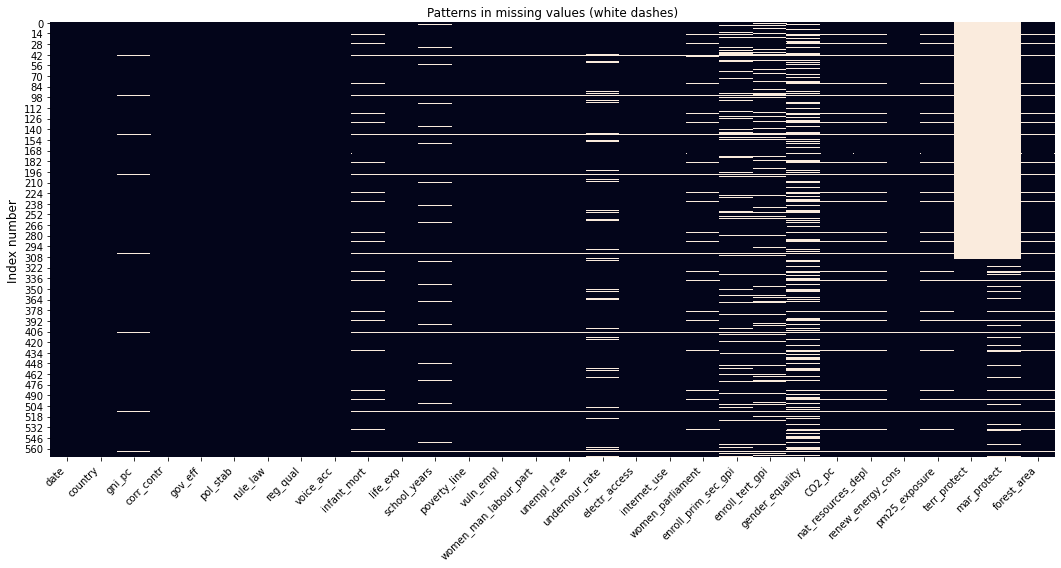

In [5]:
# Visualize patterns in missing values still present in the data
plt.figure(figsize=(18,8))
sns.heatmap(df_esg.isnull(), cbar=False)
plt.ylabel('Index number', fontweight='light', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.title('Patterns in missing values (white dashes)')
plt.show()

In [6]:
# Drop countries with missing values >30%
df_esg_final = df_esg.dropna(thresh=df_esg.shape[1]*0.66).copy()
print('Data shape:', df_esg_final.shape, '\n')
print('Number of countries:', df_esg_final['country'].nunique(), '\n')
print('Time range:', df_esg_final['date'].min(), '-', df_esg_final['date'].max(), '\n')
print('Number of observations per country:', '\n')
display(df_esg_final.groupby('country')['country'].count())

Data shape: (561, 30) 

Number of countries: 51 

Time range: 2010-01-01 00:00:00 - 2020-01-01 00:00:00 

Number of observations per country: 



country
Argentina               11
Bahrain                 11
Bangladesh              11
Barbados                11
Brazil                  11
Chile                   11
China                   11
Colombia                11
Costa Rica              11
Czech Republic          11
Dominican Republic      11
Egypt, Arab Rep.        11
El Salvador             11
Georgia                 11
Ghana                   11
Guatemala               11
Hong Kong SAR, China    11
Hungary                 11
India                   11
Indonesia               11
Iraq                    11
Israel                  11
Jamaica                 11
Jordan                  11
Kazakhstan              11
Korea, Rep.             11
Kuwait                  11
Latvia                  11
Macao SAR, China        11
Malaysia                11
Mexico                  11
Morocco                 11
Nigeria                 11
Oman                    11
Panama                  11
Paraguay                11
Peru                

## Definition of ESG ranking methodology
- All indicators have been normalized to a 0-1 scale.
- Each ESG factor's score is the average of the indicators scores belonging to that factor.
- The overall ESG score is the average of the 3 factors scores.

N.B. The reference period considered to pick the min-max values used in the normalization process is the entire time series sample (i.e., 2010-2020). This ensures that scores are comparable overtime. 

In [7]:
## ESG ranking definition
scaler = MinMaxScaler()

# Methodology
def ESG_ranking(df, invert_vars_list, env_list, soc_list, gov_list, weights_list=[0.33, 0.33, 0.34]):
    '''Function used to calculate ESG scores'''
    
    # Revert variables where smaller value means better outcome
    df[invert_vars_list] = df[invert_vars_list]*(-1)
    
    # Define columns to rescale
    rescale_vars = list(df.columns[(df.columns != 'gni_pc') & (df.columns != 'date') & (df.columns != 'country')])
    
    # Standardization of data (excluding gdp_pc)
    df[rescale_vars] = scaler.fit_transform(df[rescale_vars])
    
    # Calculate E, S and G factor scores (weighted average of indicators)
    df_stand = df.copy()
    df_stand['env_factor'] = df_stand[env_list].mean(axis=1)
    df_stand['soc_factor'] = df_stand[soc_list].mean(axis=1)
    df_stand['gov_factor'] = df_stand[gov_list].mean(axis=1)
    
    # Calculate overall ESG score as weighted average of factors
    df_stand['esg_score'] = df_stand[['env_factor', 'soc_factor', 'gov_factor']].mean(axis=1)
    
    # ESG scores data only
    esg_scores = df_stand[['date','country', 'gni_pc', 'esg_score', 'env_factor', 'soc_factor', 'gov_factor']]
    
    return esg_scores, df_stand

In [8]:
# Set parameters # , "forest_area"

invert_vars_list = ["CO2_pc", "nat_resources_depl", "pm25_exposure", "infant_mort",
                    "poverty_line", "vuln_empl", "unempl_rate", "undernour_rate"] 
env_list = ["CO2_pc", "nat_resources_depl", 'renew_energy_cons',
            "pm25_exposure", "terr_protect", "mar_protect", "forest_area"]
soc_list = ["infant_mort", "life_exp", "school_years", "poverty_line", "vuln_empl", "women_man_labour_part",
            "unempl_rate", "undernour_rate", "electr_access", "internet_use", "women_parliament",
            "enroll_prim_sec_gpi","enroll_tert_gpi", "gender_equality"]
gov_list = ["corr_contr","gov_eff", "pol_stab", "rule_law", "reg_qual", "voice_acc"]


# Calculate ESG scores
esg_scores, df_scaled = ESG_ranking(df_esg_final, invert_vars_list, env_list, soc_list, gov_list)


# Print top 10 countries by ESG score data
esg_scores.set_index('date')['2020'].sort_values('esg_score', ascending=False).head(10)

,country,gni_pc,esg_score,env_factor,soc_factor,gov_factor
date,,,,,,
2020-01-01,Latvia,17567.510080,0.742281,0.720766,0.776390,0.729688
2020-01-01,Singapore,57797.397396,0.716919,0.447834,0.784649,0.918273
2020-01-01,"Hong Kong SAR, China",50797.508441,0.712925,0.500907,0.833101,0.804767
2020-01-01,Czech Republic,22045.810496,0.710510,0.646197,0.738018,0.747314
2020-01-01,Chile,14208.811925,0.704198,0.662477,0.692780,0.757338
2020-01-01,Poland,15070.144807,0.703509,0.688908,0.748248,0.673370
2020-01-01,Costa Rica,11928.895073,0.694023,0.696502,0.709450,0.676116
2020-01-01,"Korea, Rep.",32122.941014,0.673732,0.545290,0.723127,0.752778
2020-01-01,Israel,43382.691170,0.659965,0.470499,0.809795,0.699602


## Top 10 countries by overall ESG score (2020)

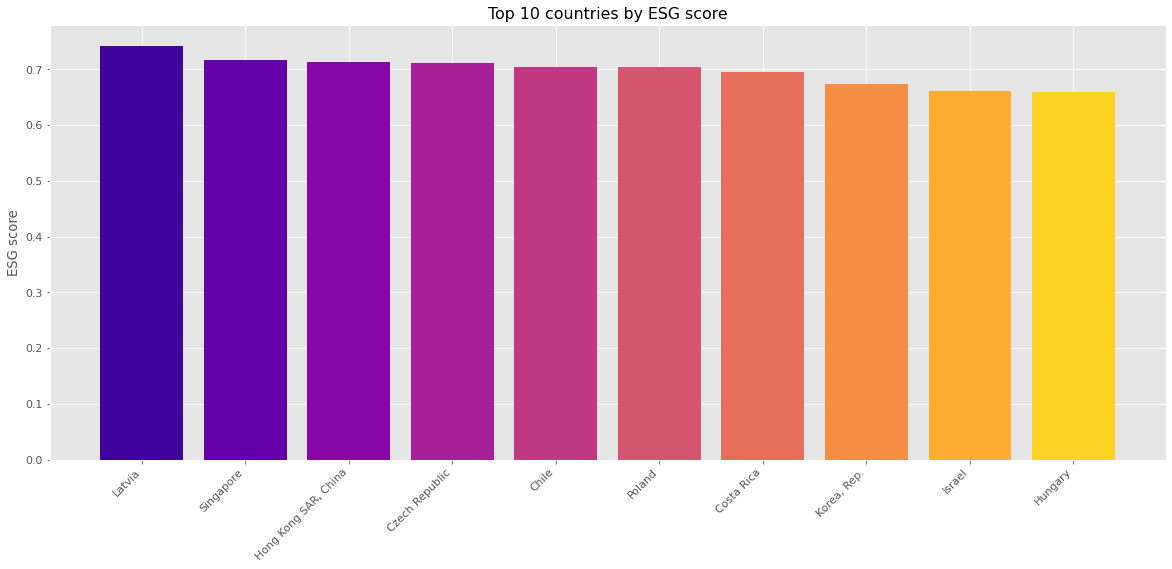

In [9]:
## Top 10 countries by ESG score bar chart

data = esg_scores[esg_scores['date'] == '2020'].sort_values('esg_score', ascending=False)['esg_score']
lbls = esg_scores[esg_scores['date'] == '2020'].sort_values('esg_score', ascending=False)['country']

# Plot
plt.style.use('ggplot')#set style
plt.rcParams["font.size"] = 11 # set default font size

fig = plt.figure(figsize=(20, 8))#set subplot and fig size

plt.bar(np.arange(10), data.head(10), color=sns.color_palette("plasma", 10))
plt.xticks(np.arange(10), lbls.head(10), rotation=45, ha="right")
plt.ylabel('ESG score')
plt.title('Top 10 countries by ESG score')

plt.show()

## Top 10 performers in ESG scores (2020)

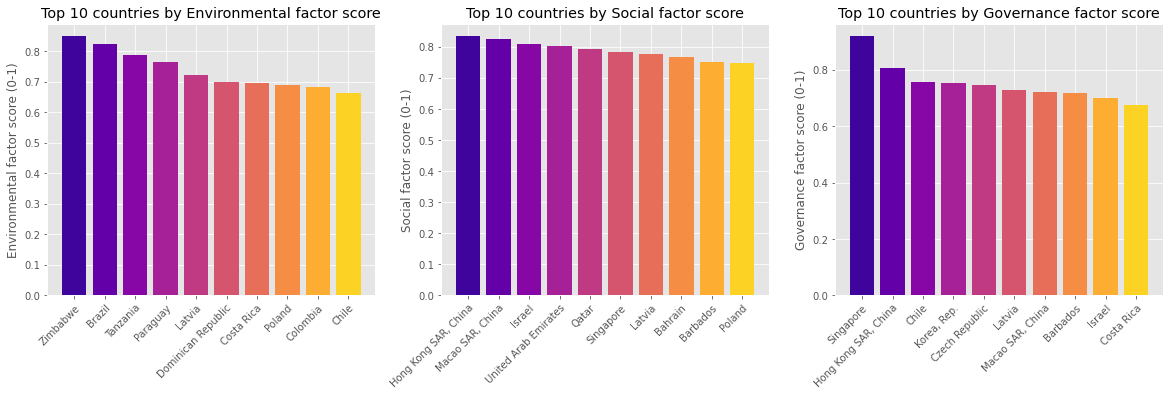

In [10]:
## Top 10 performers in overall ESG and ESG factors

plt.style.use('ggplot')#set style
plt.rcParams["font.size"] = 10 # set default font size

fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(20, 5))#set subplot and fig size

## AX1 - ESG overall

#data_1 = esg_scores[esg_scores['date'] == '2020'].sort_values('esg_score', ascending=False)['esg_score']
#lbls_1 = esg_scores[esg_scores['date'] == '2020'].sort_values('esg_score', ascending=False)['country']


#ax1.bar(lbls_1.head(10), data_1.head(10), color=sns.color_palette("plasma", 10))
#ax1.set_ylabel('ESG score')
#ax1.set_title('Top 10 countries by ESG score (0-1)')
#plt.setp(ax1.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

## AX2 - Environmental factor

data_2 = esg_scores[esg_scores['date'] == '2020'].sort_values('env_factor', ascending=False)['env_factor']
lbls_2 = esg_scores[esg_scores['date'] == '2020'].sort_values('env_factor', ascending=False)['country']


ax2.bar(lbls_2.head(10), data_2.head(10), color=sns.color_palette("plasma", 10))
ax2.set_ylabel('Environmental factor score (0-1)')
ax2.set_title('Top 10 countries by Environmental factor score')
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

## AX3 - Social factor

data_3 = esg_scores[esg_scores['date'] == '2020'].sort_values('soc_factor', ascending=False)['soc_factor']
lbls_3 = esg_scores[esg_scores['date'] == '2020'].sort_values('soc_factor', ascending=False)['country']


ax3.bar(lbls_3.head(10), data_3.head(10), color=sns.color_palette("plasma", 10))
ax3.set_ylabel('Social factor score (0-1)')
ax3.set_title('Top 10 countries by Social factor score')
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

## AX4 - Governance factor

data_4 = esg_scores[esg_scores['date'] == '2020'].sort_values('gov_factor', ascending=False)['gov_factor']
lbls_4 = esg_scores[esg_scores['date'] == '2020'].sort_values('gov_factor', ascending=False)['country']


ax4.bar(lbls_4.head(10), data_4.head(10), color=sns.color_palette("plasma", 10))
ax4.set_ylabel('Governance factor score (0-1)')
ax4.set_title('Top 10 countries by Governance factor score')
plt.setp(ax4.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.show()

## ESG performance vs GNI per-capita (USD)

In [11]:
## Merge ESG df with sovereign spread yields df

# Add country IDs column to merge ESG scores df with sovereign spread yields df

coun_lbl_list = list(esg_scores['country'].unique())
coun_df = pd.DataFrame()

for country in coun_lbl_list:
    add = pd.DataFrame(wbdata.search_countries(country))
    coun_df = pd.concat([coun_df, add], ignore_index=True)[['id', 'name']]

# Name columns with same label to merge
coun_df.rename(columns={'name': 'country'}, inplace=True)

# Merge country IDs with ESG df
esg_scores = esg_scores.merge(coun_df, how='inner', on='country')

# Convert ESG df dates to year-month format
esg_scores['date'] = esg_scores['date'].dt.to_period('m')

# Reshape sovereign spread yields df 
spread_df = df.set_index('Date').stack().reset_index().rename(columns={'Date': 'date', 'level_1': 'id', 0 : 'spread'}).copy()

# Convert sovereign spread yields df dates to year-month format
spread_df['date'] = spread_df['date'].dt.to_period('m')

# Finally, merge spread df with ESG score df
df_final = spread_df.merge(esg_scores, how='left', on=['id', 'date'])

# Interpo
df_final.head()

,date,id,spread,country,gni_pc,esg_score,env_factor,soc_factor,gov_factor
0,2010-01,ARG,464.351,Argentina,10029.306306,0.579059,0.603445,0.696954,0.436778
1,2010-01,BHR,392.941,Bahrain,18809.682591,0.513600,0.325247,0.711561,0.503994
2,2010-01,BRB,712.853,Barbados,15659.570731,0.700224,0.591501,0.704684,0.804487
3,2010-01,BRA,304.662,Brazil,10937.608372,0.660750,0.861653,0.580084,0.540513
4,2010-01,CHL,224.502,Chile,11904.154745,0.704962,0.639575,0.646494,0.828815


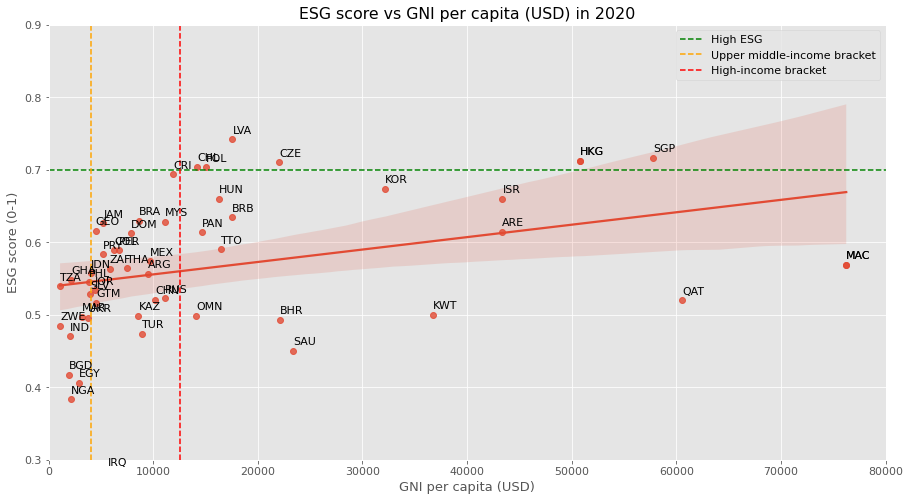

In [12]:
## Scatter plot overall ESG vs GNI per capita (ID LABELS)

esg_2020 = esg_scores[esg_scores['date'] == '2020']['esg_score']
gdp_2020 = esg_scores[esg_scores['date'] == '2020']['gni_pc']
coun_2020 = esg_scores[esg_scores['date'] == '2020']['id']

# Set font of the chart and figure size
plt.style.use('ggplot')#set style
plt.rcParams["font.size"] = 11 # set default font size

fig, ax = plt.subplots(1, figsize=(15,8))

# Scatter
ax = sns.regplot(x=gdp_2020, y=esg_2020, ax=ax)

# Groups lines
#plt.axhline(y=0.5, color='orange', label='Medium ESG', linestyle='--')
plt.axhline(y=0.7, color='green', label='High ESG', linestyle='--')
plt.axvline(x=4046, color='orange', label='Upper middle-income bracket', linestyle='--')
plt.axvline(x=12535, color='red', label='High-income bracket', linestyle='--')

# Marker's labels
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.05, point['y']+.008, str(point['val']))

label_point(gdp_2020, esg_2020, coun_2020, ax)

        
# Details
plt.title('ESG score vs GNI per capita (USD) in 2020')
plt.ylabel('ESG score (0-1)', fontweight='light', fontsize=13)
plt.xlabel('GNI per capita (USD)', fontweight='light', fontsize=13)
plt.xlim(0, 80000)
plt.ylim(0.3, 0.9)
plt.legend()

plt.show()

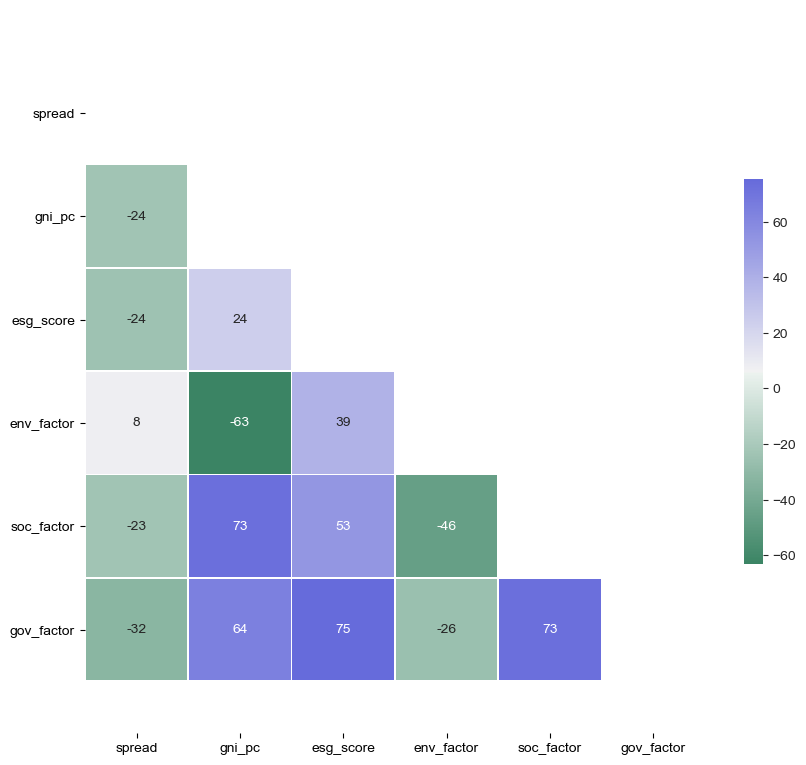

In [13]:
## Correlation matrix ESG, GNI per capita and spread

plt.style.use('default')#set style
plt.rcParams["font.size"] = 10 # set default font size

f, ax = plt.subplots(1, figsize=(10, 10))
cmap = sns.diverging_palette(150, 265, as_cmap=True)
sns.set_style(style = 'white')

mask = np.triu(np.ones_like(df_final.corr(), dtype=np.bool))

sns.heatmap(100*df_final.corr(), cmap=cmap, mask=mask, square=True, annot=True, fmt='.0f', linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);
plt.yticks(rotation=0)
#plt.xticks(rotation=0)

ax.set_ylim((6+0.5, -0.5))
plt.show()

In [14]:
# Sort by ESG score and spread
df_final[df_final['date'] == '2020'].groupby('id').mean().sort_values(['esg_score','spread'], ascending=False).head(10)

,spread,gni_pc,esg_score,env_factor,soc_factor,gov_factor
id,,,,,,
LVA,1318.959,17567.510080,0.742281,0.720766,0.776390,0.729688
SGP,198.628,57797.397396,0.716919,0.447834,0.784649,0.918273
HKG,302.044,50797.508441,0.712925,0.500907,0.833101,0.804767
CZE,199.250,22045.810496,0.710510,0.646197,0.738018,0.747314
CHL,279.261,14208.811925,0.704198,0.662477,0.692780,0.757338
POL,278.892,15070.144807,0.703509,0.688908,0.748248,0.673370
KOR,207.453,32122.941014,0.673732,0.545290,0.723127,0.752778
ISR,368.509,43382.691170,0.659965,0.470499,0.809795,0.699602
HUN,65.451,16295.910523,0.659810,0.639417,0.731031,0.608981


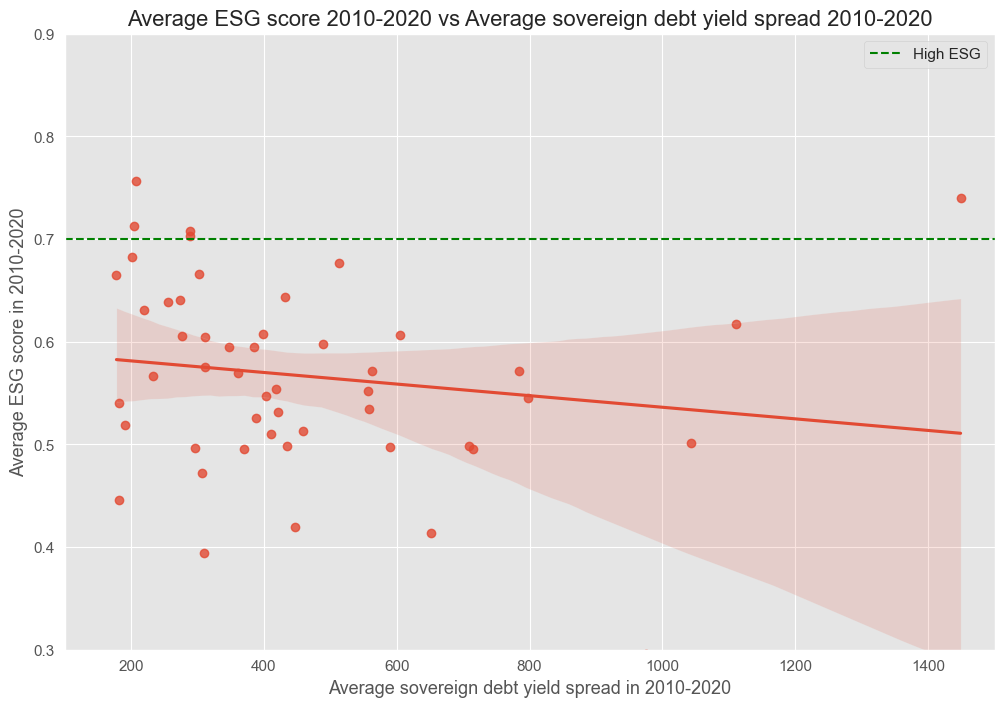

In [15]:
## Scatter plot overall ESG vs spreads

avg_esg = df_final.groupby('id')['esg_score'].mean().dropna()
avg_spread = df_final.groupby('id')['spread'].mean().drop('TWN')
avg_coun = pd.Series(df_final.groupby('id')['esg_score'].mean().index.drop('TWN'))

# Set font of the chart and figure size
plt.style.use('ggplot')#set style
plt.rcParams["font.size"] = 11 # set default font size

fig, ax = plt.subplots(1, figsize=(12,8))

# Scatter
ax = sns.regplot(x=avg_spread, y=avg_esg, ax=ax)

# Groups lines
#plt.axhline(y=0.5, color='orange', label='Medium ESG', linestyle='--')
plt.axhline(y=0.7, color='green', label='High ESG', linestyle='--')

# Marker's labels
#label_point(avg_spread, avg_esg, avg_coun, ax)

        
# Details
plt.title('Average ESG score 2010-2020 vs Average sovereign debt yield spread 2010-2020')
plt.ylabel('Average ESG score in 2010-2020', fontweight='light', fontsize=13)
plt.xlabel('Average sovereign debt yield spread in 2010-2020', fontweight='light', fontsize=13)

plt.xlim(100, 1500)
plt.ylim(0.3, 0.9)
plt.legend()


plt.show()

# Section 2 - Sovereign debt spread forecasting model based on ESG data

## 2.1) VAR model assessed with RMSE

In [16]:
# Data adjustments
prova = df_final.pivot_table(index='date', columns='id', values=['spread', 'gni_pc', 'esg_score', 'env_factor', 'soc_factor', 'gov_factor'])
prova.index = prova.index.astype(str)
prova.index = pd.to_datetime(prova.index)
prova = prova.interpolate(method='polynomial', order=2, limit_area='inside', limit_direction='forward').stack().reset_index()

# Restrict analysis to time series of one country
test = prova[prova['id'] == 'SGP'].copy()

# Log-diff data to make time series stationary
test[['gni_pc', 'esg_score', 'spread', 'env_factor', 'soc_factor', 'gov_factor']] = np.log(test[['gni_pc', 'esg_score', 'spread', 'env_factor', 'soc_factor', 'gov_factor']]).diff()
test_diff = test.set_index('date').copy()

# Remove values for year 2021
test = test.dropna(thresh=test.shape[1]*0.66).set_index('date')
test

,id,env_factor,esg_score,gni_pc,gov_factor,soc_factor,spread
date,,,,,,,
2010-02-01,SGP,2.530637e-04,-0.000564,0.013636,-0.001414,-0.000263,0.038938
2010-03-01,SGP,1.864870e-04,-0.000403,0.011525,-0.001026,-0.000177,-0.054241
2010-04-01,SGP,1.598998e-04,-0.000328,0.011913,-0.000857,-0.000128,-0.085829
2010-05-01,SGP,1.081695e-04,-0.000200,0.010709,-0.000550,-0.000056,0.165211
2010-06-01,SGP,6.366653e-05,-0.000085,0.010245,-0.000279,0.000012,0.035556
...,...,...,...,...,...,...,...
2019-09-01,SGP,-4.285737e-05,-0.000277,0.000372,0.000068,-0.000813,-0.014155
2019-10-01,SGP,-9.114836e-07,-0.000284,0.000603,0.000111,-0.000905,-0.038327
2019-11-01,SGP,4.097375e-05,-0.000310,0.000875,0.000161,-0.001059,-0.038423


In [17]:
# Final df for VAR input
data = test[['spread', 'env_factor', 'soc_factor', 'gov_factor']]

In [18]:
# Define VAR model
from statsmodels.tsa.api import VAR

model = VAR(data)

model.select_order(3)
results = model.fit(maxlags=3, ic='aic')

results.summary()

C:\Users\marco\Anaconda3\envs\exts-ml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 27, Sep, 2021
Time:                     05:31:57
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -55.7402
Nobs:                     117.000    HQIC:                  -56.4694
Log likelihood:           2720.55    FPE:                1.82308e-25
AIC:                     -56.9678    Det(Omega_mle):     1.19612e-25
--------------------------------------------------------------------
Results for equation spread
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.006035         0.008067           -0.748           0.454
L1.spread             0.012490         0.096881            0.129           0.897
L1.env_factor         4.640024        19.837577            

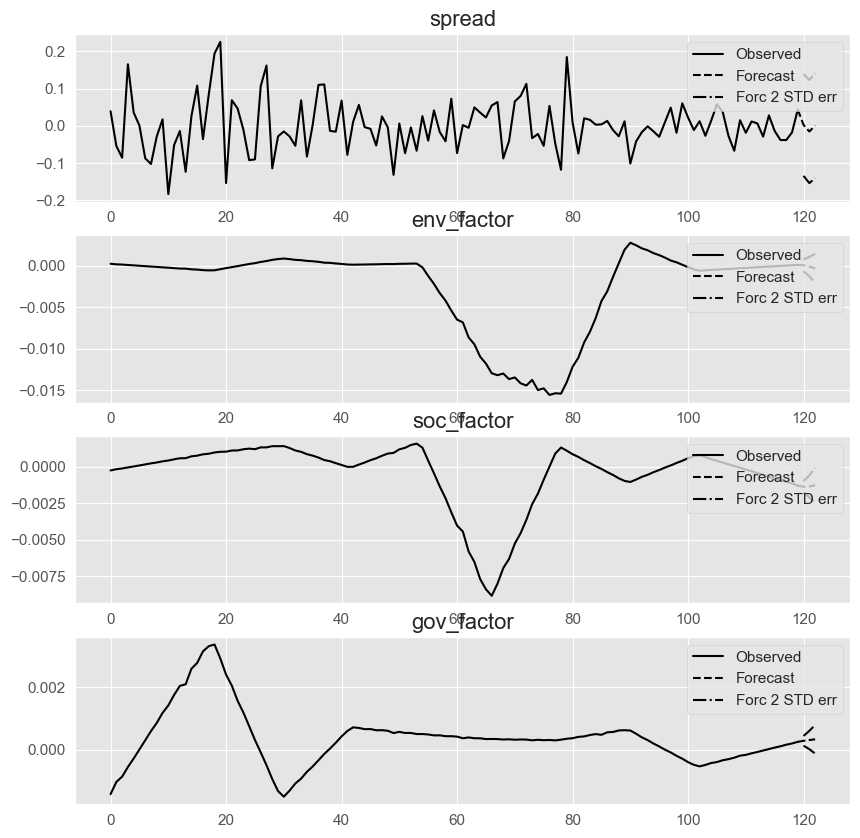

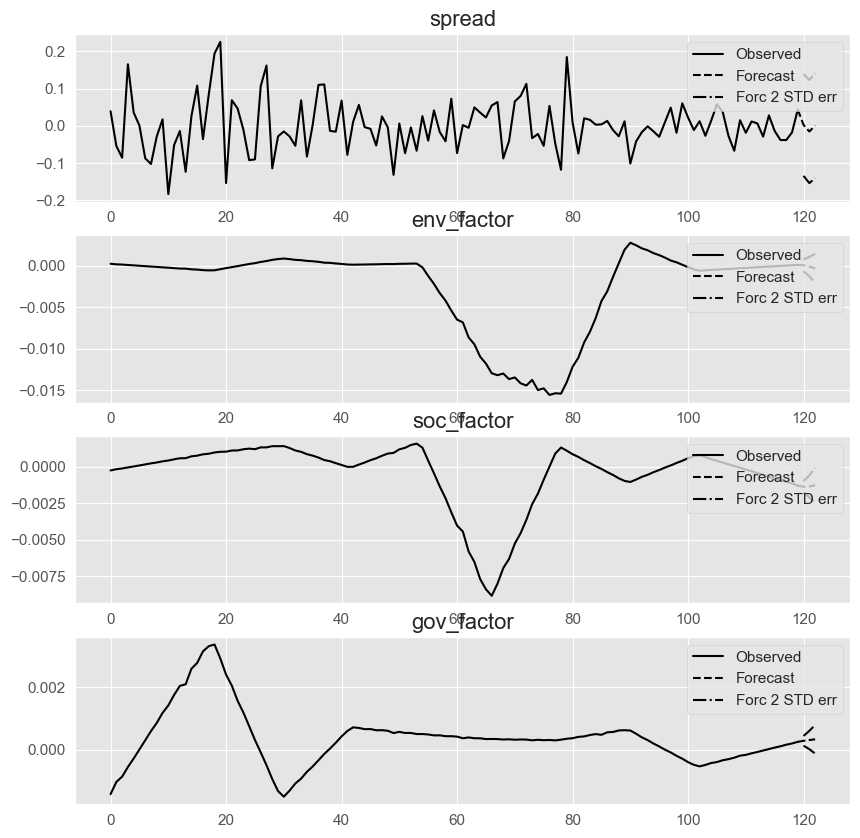

In [19]:
# Plot 3-months ahead forecast with confidence interval 90%
results.plot_forecast(3)

In [20]:
# Calculate 3-month ahead forecast
lag_order = results.k_ar
y_pred = pd.DataFrame(results.forecast(data.values[-lag_order:], steps=3)).loc[:, 0]
y_real = test_diff['2020-02':'2020-04']['spread']

# Evaluate with RMSE
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_real, y_pred, squared=True)
print('RMSE:', rmse)

RMSE: 0.039019562488947675


## 2.2) Machine learning models and backtesting

## 2.2.1) RNN

In [21]:
from darts import TimeSeries
from darts.models import RNNModel
from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.models import ExponentialSmoothing
from darts.models import Prophet
from darts.metrics import mape
import warnings
warnings.filterwarnings("ignore")

ERROR:fbprophet.plot:Importing plotly failed. Interactive plots will not work.


In [22]:
# Reshape, interpolate, drop year 2021, and adjust data
rnn_data = df_final.pivot_table(index='date', columns='id', values=['spread', 'gni_pc', 'esg_score', 'env_factor', 'soc_factor', 'gov_factor'])

# Convert index to dateTime
rnn_data.index = rnn_data.index.astype(str)
rnn_data.index = pd.to_datetime(rnn_data.index)

# Interpolate missing values between observations
rnn_data = rnn_data.interpolate(method='polynomial', order=2, limit_area='inside', limit_direction='forward')

# Drop years with too many missing data
rnn_data_test = rnn_data.dropna(thresh=rnn_data.shape[0]*0.66)

# Bring columns labels to one level
rnn_data_test.columns = rnn_data_test.columns.map('_'.join).str.strip('_')
rnn_data_test = rnn_data_test.reset_index()
rnn_data_test.head()

,date,env_factor_ARE,env_factor_ARG,env_factor_BGD,env_factor_BHR,env_factor_BRA,env_factor_BRB,env_factor_CHL,env_factor_CHN,env_factor_COL,...,spread_SGP,spread_SLV,spread_THA,spread_TTO,spread_TUR,spread_TWN,spread_TZA,spread_UKR,spread_ZAF,spread_ZWE
0,2010-01-01,0.408712,0.603445,NaN,0.325247,0.861653,0.591501,0.639575,0.500888,0.775913,...,211.705,NaN,283.215,NaN,517.126,400.960,NaN,1376.331,459.082,NaN
1,2010-02-01,0.407617,0.602750,NaN,0.325544,0.860896,0.590048,0.638743,0.497755,0.773624,...,220.111,NaN,288.972,NaN,526.159,422.153,NaN,1411.650,514.118,NaN
2,2010-03-01,0.406661,0.602177,NaN,0.325716,0.860240,0.588763,0.638127,0.495257,0.771710,...,208.490,NaN,248.962,NaN,503.233,365.876,NaN,787.873,441.662,NaN
3,2010-04-01,0.405637,0.601604,NaN,0.325799,0.859542,0.587372,0.637594,0.492860,0.769763,...,191.342,451.885,262.821,NaN,521.688,324.948,NaN,788.378,457.823,NaN
4,2010-05-01,0.404681,0.601112,NaN,0.325773,0.858896,0.586057,0.637228,0.490909,0.768049,...,225.715,527.009,310.661,NaN,559.676,397.631,NaN,973.514,537.613,NaN


In [23]:
# Prepare data for machine learning models
past_covariates = list(rnn_data_test.columns[(rnn_data_test.columns != 'spread_SPG') & (rnn_data_test.columns != 'date')])

X = TimeSeries.from_dataframe(rnn_data_test, 'date', past_covariates)
y = TimeSeries.from_dataframe(rnn_data_test, 'date', 'spread_SGP')

scaler_X, scaler_y = Scaler(), Scaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_tr, X_val = X_scaled.split_before(pd.Timestamp('2018-06'))
y_tr, y_val = y_scaled.split_before(pd.Timestamp('2018-06'))

In [24]:
# Define RNN model with LSTM cells

model_rnn = RNNModel(model='LSTM', input_chunk_length=6, output_chunk_length=1, n_epochs=100, random_state=0)

# Fit model
model_rnn.fit(series=[y_tr],
              verbose=True)

# Backtest model
backtest_rnn = model_rnn.historical_forecasts(y_val,
                                              start=0.33,
                                              forecast_horizon=3,
                                              stride=1,
                                              retrain=False,
                                              verbose=True)

[2021-09-27 05:32:01,428] INFO | darts.models.torch_forecasting_model | Train dataset contains 95 samples.
[2021-09-27 05:32:01,428] INFO | darts.models.torch_forecasting_model | Train dataset contains 95 samples.
INFO:darts.models.torch_forecasting_model:Train dataset contains 95 samples.


Training loss: 0.0287


MAPE RNN model (without covariates) = 6.62%


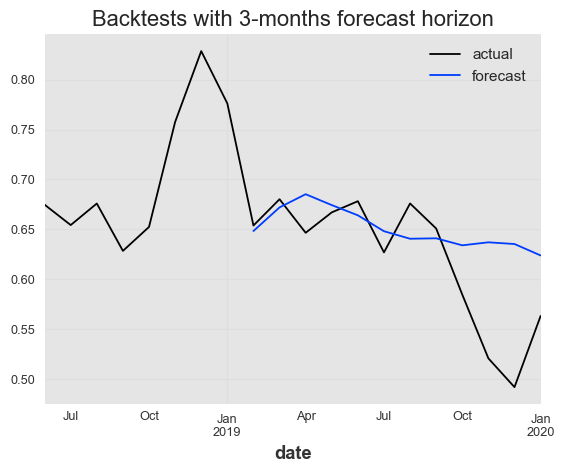

In [25]:
# Plot actual data vs backetested model forecast
y_val.plot(label='actual')
backtest_rnn.plot(label='forecast')
plt.title('Backtests with 3-months forecast horizon')
plt.legend();
print('MAPE RNN model (without covariates) = {:.2f}%'.format(mape(backtest_rnn, y_val)))

## 2.2.2) Exponential Smoothing model and Facebook Prophet

In [26]:
# Manipulation to prepare data for model
prova = df_final.pivot_table(index='date', columns='id', values=['spread', 'gni_pc', 'esg_score', 'env_factor', 'soc_factor', 'gov_factor'])
prova.index = prova.index.astype(str)
prova.index = pd.to_datetime(prova.index)
prova = prova.interpolate(method='polynomial', order=2, limit_area='inside', limit_direction='forward').stack().reset_index()

# Select only one country
test = prova[prova['id'] == 'SGP'].copy()
#test[['gni_pc', 'esg_score', 'spread', 'env_factor', 'soc_factor', 'gov_factor']] = np.log(test[['gni_pc', 'esg_score', 'spread', 'env_factor', 'soc_factor', 'gov_factor']]).diff()

# Drop year 2021
test = test.dropna(thresh=test.shape[1]*0.66).reset_index(drop=True)
test.head()

,date,id,env_factor,esg_score,gni_pc,gov_factor,soc_factor,spread
0,2010-01-01,SGP,0.607512,0.772385,46726.582212,0.878456,0.831185,211.705
1,2010-02-01,SGP,0.607666,0.771949,47368.086356,0.877215,0.830967,220.111
2,2010-03-01,SGP,0.607779,0.771638,47917.140365,0.876315,0.830820,208.490
3,2010-04-01,SGP,0.607876,0.771385,48491.398668,0.875564,0.830713,191.342
4,2010-05-01,SGP,0.607942,0.771230,49013.491205,0.875083,0.830666,225.715


In [27]:
# Set input data
X = test[['date', 'spread', 'env_factor', 'soc_factor', 'gov_factor']]
X = TimeSeries.from_dataframe(X, 'date', ['spread', 'env_factor', 'soc_factor', 'gov_factor'])
X

             spread  env_factor  soc_factor  gov_factor
date                                                   
2010-01-01  211.705    0.607512    0.831185    0.878456
2010-02-01  220.111    0.607666    0.830967    0.877215
2010-03-01  208.490    0.607779    0.830820    0.876315
2010-04-01  191.342    0.607876    0.830713    0.875564
2010-05-01  225.715    0.607942    0.830666    0.875083
...             ...         ...         ...         ...
2019-09-01  209.033    0.447724    0.788122    0.917608
2019-10-01  201.173    0.447724    0.787408    0.917710
2019-11-01  193.590    0.447742    0.786575    0.917857
2019-12-01  190.169    0.447778    0.785675    0.918040
2020-01-01  198.628    0.447834    0.784649    0.918273

[121 rows x 4 columns]
Freq: MS

In [28]:
# Define models and backtest
models = [ExponentialSmoothing(), Prophet(weekly_seasonality=True, daily_seasonality=True)]
backtests = [model.historical_forecasts(X['spread'],
                            start=.7,
                            forecast_horizon=3)
             for model in models]

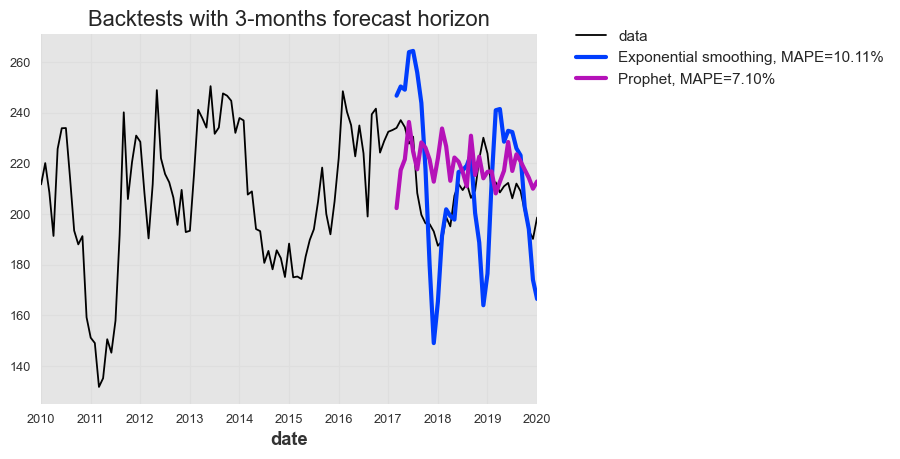

In [29]:
# Plot actual values
X['spread'].plot(label='data')

# Plot backtest series from models
for i, m in enumerate(models):
    err = mape(backtests[i], X['spread'])
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.show()